### Data Analysis of Air Quality

### Description:

We examine air quality data in this notebook, concentrating on NO2 levels, in order to identify significant trends and patterns. Data cleansing, resampling, rolling window analysis, seasonal decomposition, and visualization are all included in the analysis.

### Steps Covered:

1. **Preparation of Data:**

   - To handle missing values, the dataset was loaded and cleaned.
   - To improve time series analysis, dates were parsed and a new datetime index was developed.
   - chosen pertinent columns to highlight NO2 levels and other important air quality indicators.

2. **Rolling Windows and Resampling:**

   - To give a better picture of daily patterns, the data was resampled to a daily frequency.
   - To smooth the data and show underlying trends, a rolling 7-day frame was applied.

3. **Decomposition by Season:**

   To enhance comprehension of the fundamental patterns, the data was divided into three categories: trend, seasonal, and residual components.

   - Missing data were interpolated to guarantee a continuous time series for decomposition.

4. **Visualization:**

   - Produced thorough visual aids to properly convey the results, such as:

     - The seven-day moving average and daily NO2 values.

     - Seasonal decomposition plots with residual, trend, observed, and seasonal components displayed.

     - Extra plots that display moving averages and daily levels for other important data.

### Illustration:

- Created visually appealing, educational, and easily understandable visualizations using Matplotlib that successfully convey important information.


### Libraries Used:
- pandas
- matplotlib
- statsmodels
---

In [1]:
import pandas as pd

df = pd.read_csv("/content/air_quality.csv", sep=';', decimal=',', na_values=-200)

print(df.head())

         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

In [2]:
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [3]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df.set_index('datetime', inplace=True)

selected_columns = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']
df = df[selected_columns]

df.dropna(inplace=True)

df.sort_index(inplace=True)

print(df.head())

                     PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
datetime                                                                  
2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

                     NOx(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
datetime                                                                      
2004-03-10 18:00:00    166.0        1692.0       1268.0  13.6  48.9  0.7578   
2004-03-10 19:00:00    103.0        1559.0        972.0  13.3  47.7  0.7255   
2004-03-10 20:00:00    131.0        1555.0       1074.0  11.9  54.0  0.7502   
2004-03-10 21:00:00    172.0        1584.0       1203.0  11.0  60.0  0.7867   


<ipython-input-3-86109899409e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


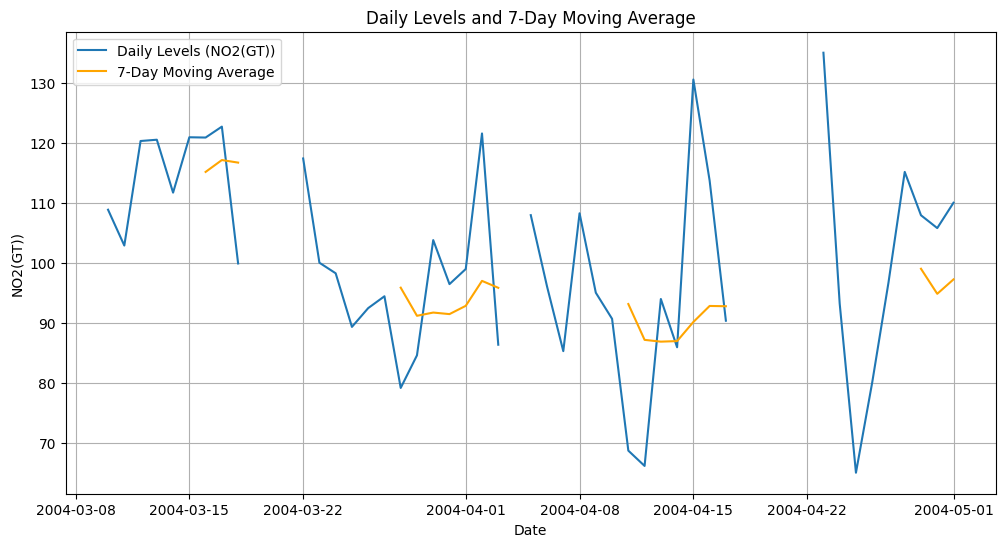

In [4]:
import matplotlib.pyplot as plt

df1 = df.resample('D').mean()

df2 = df1.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df1['NO2(GT)'], label='Daily Levels (NO2(GT))')
plt.plot(df2['NO2(GT)'], label='7-Day Moving Average', color='orange')
plt.title('Daily Levels and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('NO2(GT))')
plt.legend()
plt.grid()
plt.show()

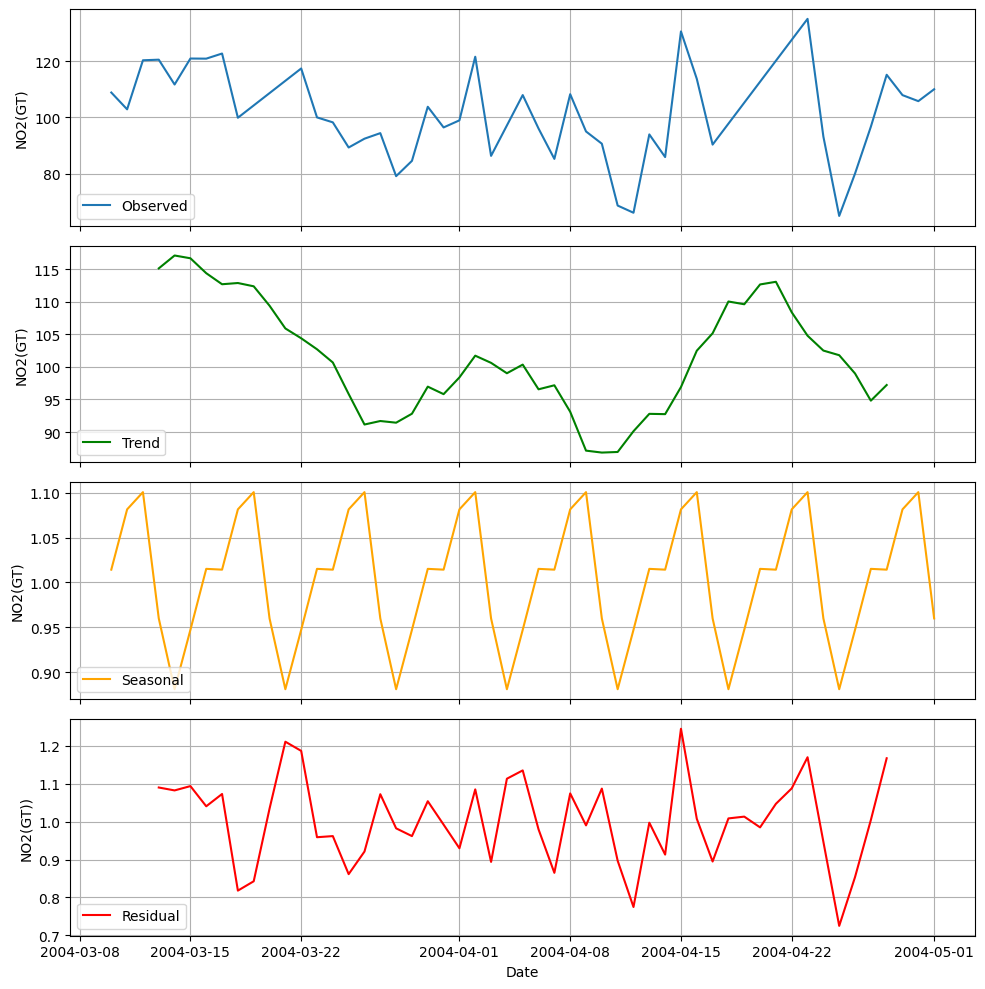

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

df1 = df1.asfreq('D')

# Interpolate missing values
df3 = df1.interpolate()

# Perform seasonal decomposition on one of the columns (e.g., 'NO2(GT))') with a weekly period
decomposition_result = seasonal_decompose(df3['NO2(GT)'], model='multiplicative', period=7)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

# Observed
ax1.plot(decomposition_result.observed, label='Observed')
ax1.legend(loc='lower left')
ax1.set_ylabel('NO2(GT)')
ax1.grid()
# Trend
ax2.plot(decomposition_result.trend, label='Trend', color='green')
ax2.legend(loc='lower left')
ax2.set_ylabel('NO2(GT)')
ax2.grid()

# Seasonal
ax3.plot(decomposition_result.seasonal, label='Seasonal', color='orange')
ax3.legend(loc='lower left')
ax3.set_ylabel('NO2(GT)')
ax3.grid()

# Residual
ax4.plot(decomposition_result.resid, label='Residual', color='red')
ax4.legend(loc='lower left')
ax4.set_ylabel('NO2(GT))')
ax4.set_xlabel('Date')
ax4.grid()

plt.tight_layout()
plt.show()

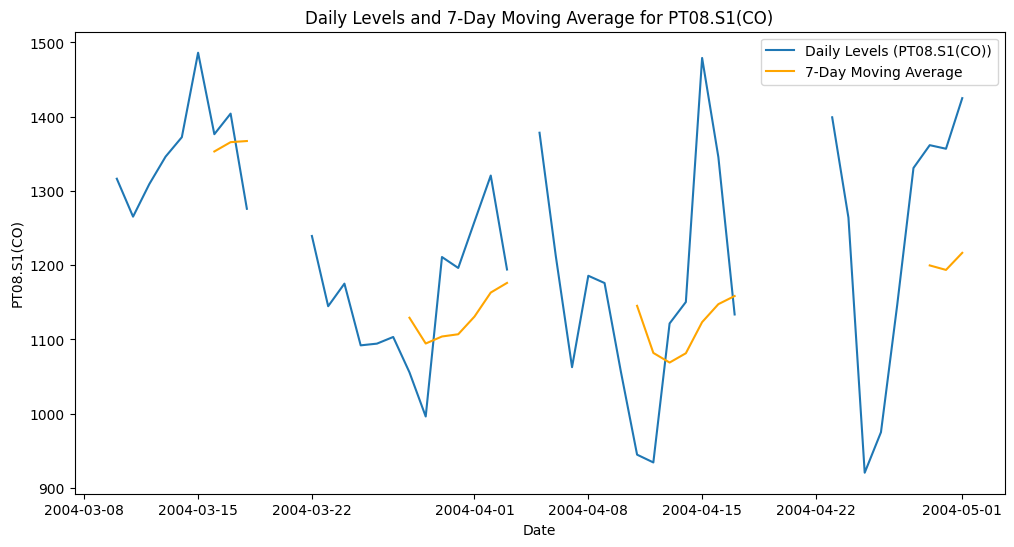

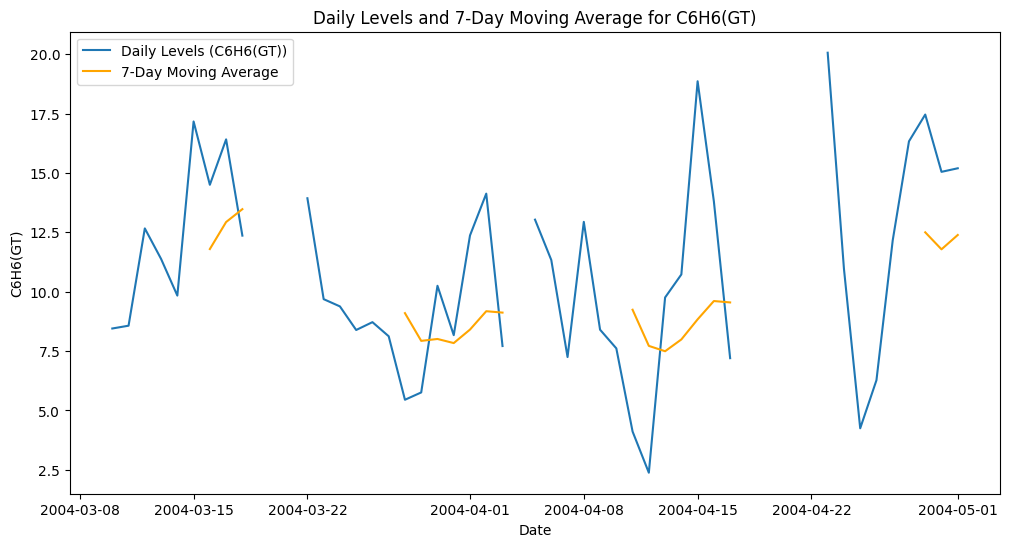

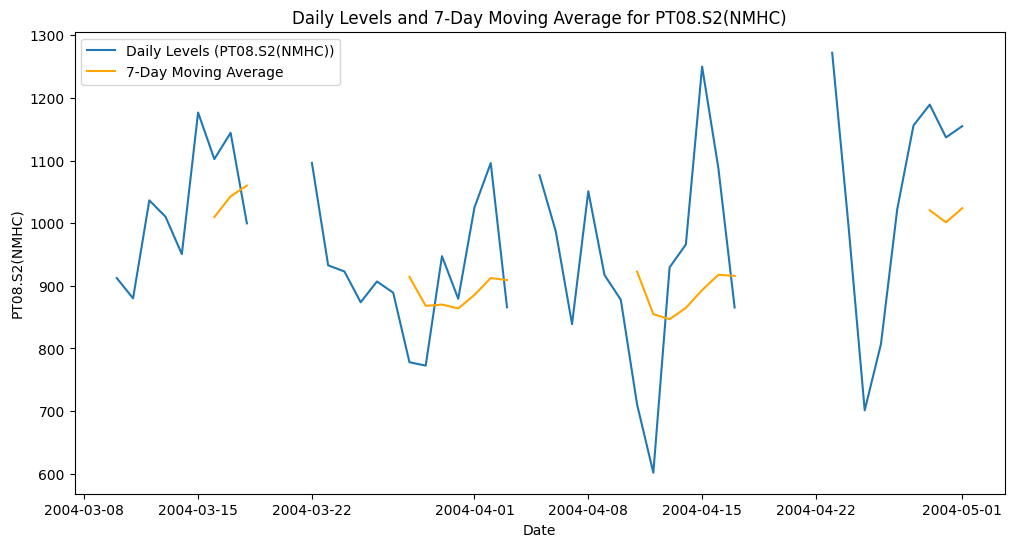

In [6]:
columns_to_plot = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(df1[column], label=f'Daily Levels ({column})')
    plt.plot(df2[column], label='7-Day Moving Average', color='orange')
    plt.title(f'Daily Levels and 7-Day Moving Average for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.show()